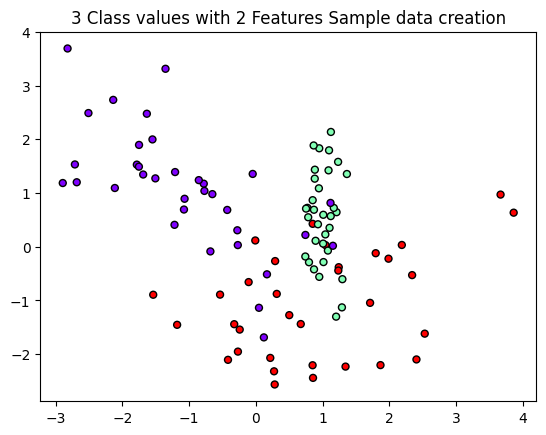

In [11]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 
X_features, y_labels = make_classification(n_features =2, n_redundant =0, n_informative=2, n_classes =3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0], X_features[:,1], marker ='o', c=y_labels, s=25, cmap='rainbow', edgecolor = 'k')

In [20]:
# 분류 학습한걸 가지고 시각화까지 해보기
import numpy as np
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary (model, X, y):
  fig, ax = plt.subplots()
  # 학습 데이타 scatter plot으로 나타내기
  ax.scatter (X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k', clim = (y.min(), y.max()), zorder=3)
  ax.axis('tight')
  ax.axis('off')
  xlim_start, xlim_end =   ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()
  # 호출 파라미터로 들어온 training 데이타로 model 학습.
  model.fit(X, y)
  # meshgrid 형태인 모든 좌표값으로 예측 수행.
  xx, yy = np.meshgrid(np.linspace (xlim_start, xlim_end, num=200), np.linspace (ylim_start, ylim_end, num=200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel ()]).reshape(xx.shape)
  # contourf() 를 이용하여 class boundary 를 visualization 수행.
  n_classes = len(np. unique(y))
  contours = ax.contourf (xx, yy, Z, alpha=0.3,levels = np.arange(n_classes + 1) - 0.5, cmap = 'rainbow', clim=(y.min(), y.max()), zorder=1)
    

In [21]:
X_features.shape

(100, 2)

In [22]:
y_labels.shape

(100,)

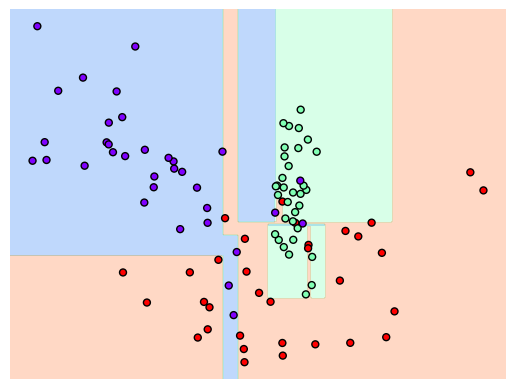

In [23]:
dt = DecisionTreeClassifier(random_state=42)

visualize_boundary(dt , X_features , y_labels )

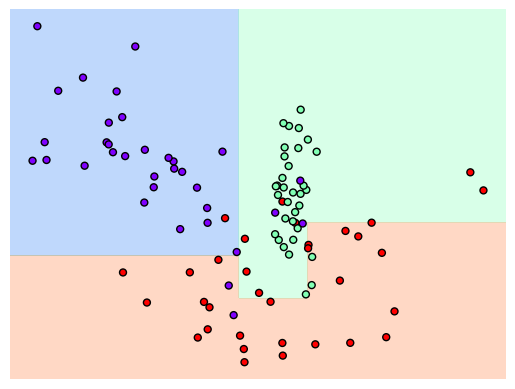

In [24]:
dt = DecisionTreeClassifier(min_samples_leaf=6 , random_state=42)

visualize_boundary(dt , X_features , y_labels )

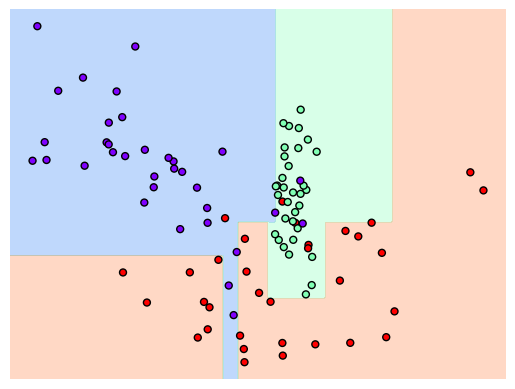

In [32]:
dt = DecisionTreeClassifier(max_depth=5 ,min_samples_split=6, random_state=42)

visualize_boundary(dt , X_features , y_labels )